<h1 style='text-align: center;'>TITANIC Exploratory Data Analysis </h1>

<img src="./images/titanichero.png" width="1000" height="500">

### A little project by Samuel
*The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster.Based on some factor involved in surviving, it seems some groups of people were more likely to survive than others. In this little project, I will do some Exploratory Data Analysis to generate some insights what is really happening based on titanic datasets.*

### List of Features & Insights :

1. Survive vs Not Survived
2. Passenger CLass
3. Passenger Sex
4. Passenger Age
5. Passenger Fare
6. Embarked
7. Passenger Cabin

In [1]:
import pandas as pd # olah angka
import numpy as np # olah angka
import matplotlib.pyplot as plt # lib untuk visual
import seaborn as sns # lib untuk visual
import warnings

In [2]:
titanic = pd.read_csv("titanic.csv")

display(titanic.head())
print (titanic.info())
print (titanic.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

# Data Visualization

## Features 1 - Survived vs Not Survived
### Kesimpulan
1. **Sekitar 61% Tidak Hidup**
2. **Sekitar 38% Hidup**

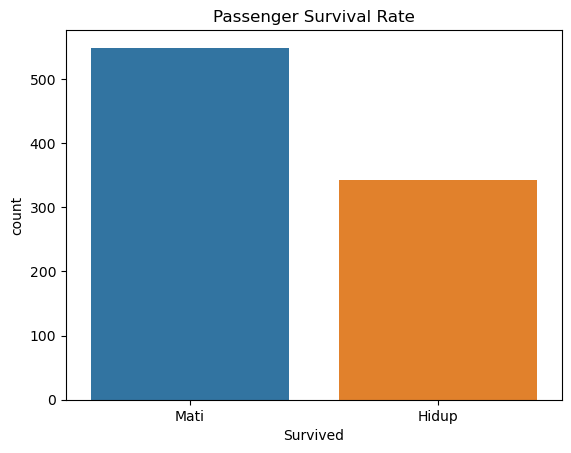

0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [3]:
sns.countplot(x="Survived",data=titanic)
plt.xticks([0, 1], ["Mati", "Hidup"])
plt.title("Passenger Survival Rate")
plt.show()

print (titanic["Survived"].value_counts(normalize=True))

## Features 2 - Kasta Penumpang
> 1. Kelas 1 > Sultan *kelasnya Rose
> 2. Kelas 2 > Manusia Biasa
> 3. Kelas 3 > Rakyat jelata *kelasnya Jack

#### Kesimpulan


1. **Sultan 63% hidup, sekitar 216 Orang.**

2. **Menengah 47% hidup, sekitar 184 Orang.**

3. **Jelata 24% hidup, sekitar 491 Orang.**

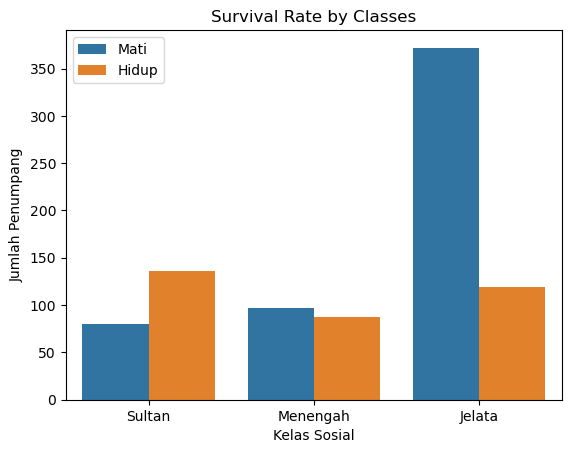

1 = Sultan, 2 = Menengah, 3 = Jelata
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [4]:
sns.countplot(x="Pclass", hue="Survived", data=titanic)
plt.title("Survival Rate by Classes")
plt.xticks([0,1,2], ["Sultan", "Menengah","Jelata"])
plt.legend(["Mati", "Hidup"])
plt.xlabel("Kelas Sosial")
plt.ylabel("Jumlah Penumpang")
plt.show()

print("1 = Sultan, 2 = Menengah, 3 = Jelata")
print(titanic["Survived"].groupby(titanic["Pclass"]).mean())
print(titanic["Pclass"].value_counts())

## Features 3 - Umur Penumpang
Range umur penumpang dari 0-80 Tahun.
### Kesimpulan
1. **Laki-Laki berumur 18-35 Tahun memiliki presentase hidup lebih besar.**
2. **Perempuan berunmur 15-40 Tahun memiliki presentase hidup lebih besar.**
3. **Untuk Laki-Laki berumur 5-18 tahun memiliki presentase hidup kecil.**

In [5]:
# missing value dari kolom umur
print(titanic["Age"].isnull().sum(), "Value yang tidak ada")

177 Value yang tidak ada


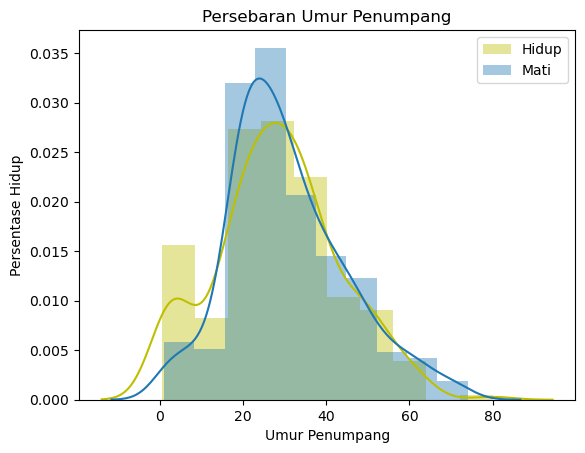

In [6]:
warnings.filterwarnings("ignore", category=FutureWarning)

# umur x survive
sns.distplot(titanic[titanic.Survived==1]["Age"],color="y", bins=10, label="Hidup")

# umur x notsurv
sns.distplot(titanic[titanic.Survived==0]["Age"], bins=10, label="Mati")

plt.legend()
plt.xlabel("Umur Penumpang")
plt.ylabel("Persentase Hidup")
plt.title("Persebaran Umur Penumpang")
plt.show()

# Features 4 - Laki vs Cewe
### Kesimpulan
1. **Presentase hidup perempuan adalah 74%.**
2. **Presentase hidup laki-laki adalah 19%.**

In [7]:
titanic.groupby(['Sex']).mean().reset_index()

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
1,male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [8]:
titanic.groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

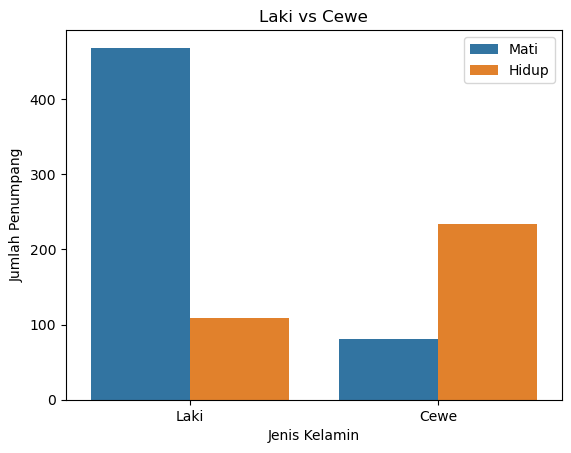

In [9]:
sns.countplot(x="Sex", hue="Survived", data=titanic)
plt.title("Laki vs Cewe")
plt.xticks([0,1], ["Laki","Cewe"])
plt.legend(["Mati", "Hidup"])
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Penumpang")
plt.show()

In [10]:
print(titanic["Survived"].groupby(titanic["Sex"]).mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [11]:
print(titanic["Sex"].value_counts())

male      577
female    314
Name: Sex, dtype: int64


# Features 5 - Embarked / Pemberangkatan
### Kesimpulan
1. **Perempuan pada pemberangkatan pelabuhan Queenstown dan Southampton memiliki presentasi hidup lebih tinggi.**
2. **Laki-Laki pada pemberangkatan pelabuhan Cherbourg memiliki presentasi hidup lebih tinggi.**

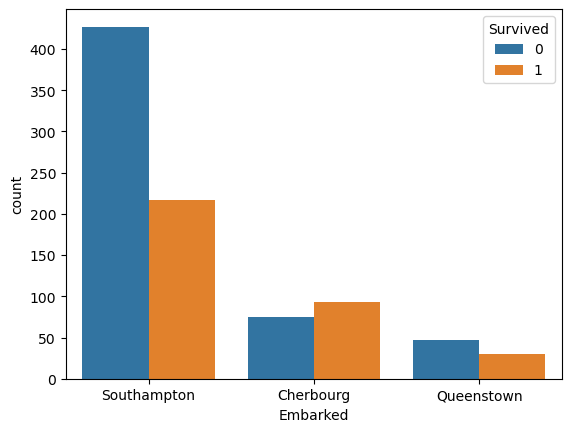

S    644
C    168
Q     77
Name: Embarked, dtype: int64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [12]:
# Make a countplot
sns.countplot(x="Embarked", hue="Survived", data=titanic)
plt.xticks([0,1,2], ["Southampton","Cherbourg","Queenstown"])
plt.show()

# Print the value counts
print(titanic["Embarked"].value_counts())

# Surviving rates of Embarked
print(titanic["Survived"].groupby(titanic["Embarked"]).mean())

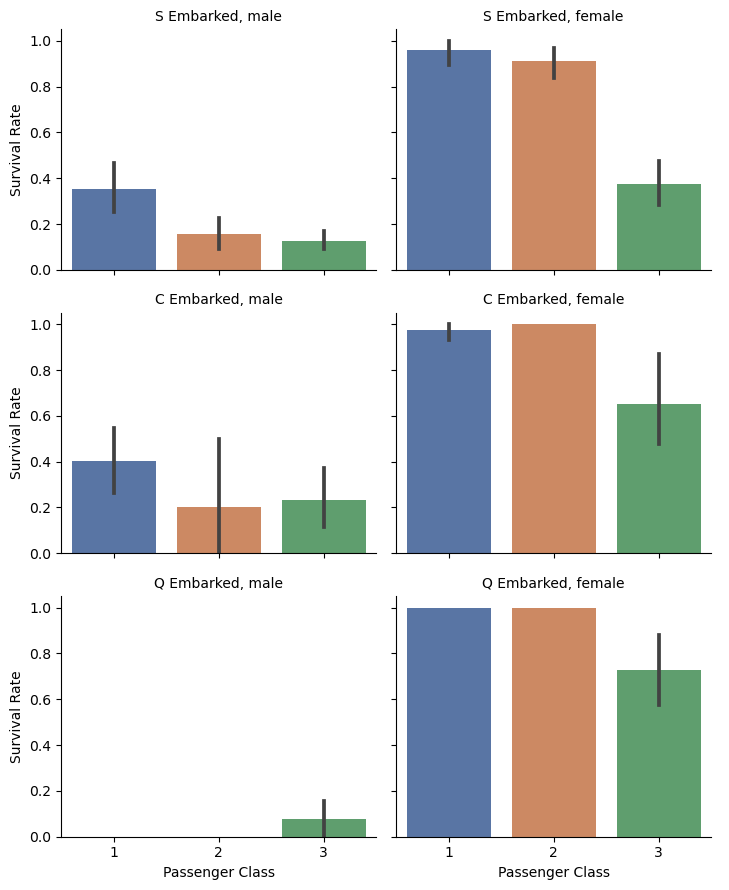

In [13]:
# 2x2 facetgrid
p = sns.FacetGrid(titanic, row='Embarked', col='Sex', height=3, aspect=1.2)

# barplot
p.map(sns.barplot, 'Pclass', 'Survived', order=[1, 2, 3], palette='deep')
p.set_axis_labels('Passenger Class', 'Survival Rate')
p.set_titles('{row_name} Embarked, {col_name}')

# Add legend and adjust plot layout
p.add_legend()
plt.tight_layout()

# Features 6 - Fare
### Kesimpulan
1. **Korelasi antara jauh nya perjalanan terhadap tingkat keberhasilan hidup penumpang kecil, jadi tidak terlalu signifikan.**


(-0.512, 170.776]     871
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: Fare, dtype: int64


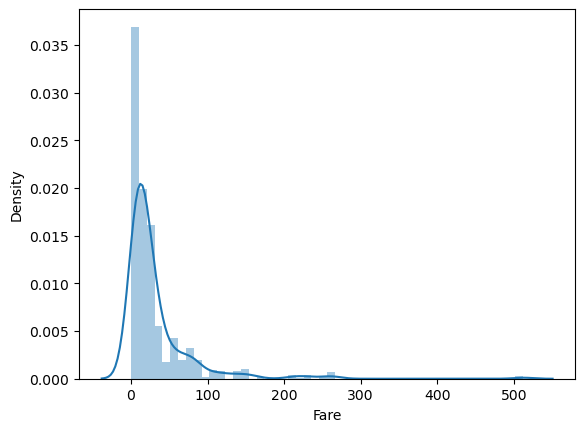

Fare
(-0.512, 170.776]     0.376579
(170.776, 341.553]    0.647059
(341.553, 512.329]    1.000000
Name: Survived, dtype: float64


In [14]:
print(pd.cut(titanic['Fare'], 3).value_counts())

sns.distplot(titanic["Fare"])
plt.show()

print(titanic['Survived'].groupby(pd.cut(titanic['Fare'], 3)).mean())

# Features 7 - Passenger Cabin
### Kesimpulan
1. **Cabin penumpang dengan presentasi hidup tinggi adalah : D, E, B, F, C.**
2. **Cabin penumpang dengan presentasi hidup sedang adalah : G dan A.**
3. **Cabin penumpang dengan presentasi hidup rendah adalah : selain diatas.**

<img src="./images/titanic.png" width="1000" height="500">

In [15]:
# unique values on cabin
print(titanic["Cabin"].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [16]:
# Get the first letters of Cabins
titanic["Cabin_first"] = titanic["Cabin"].apply(lambda x: str(x)[0])
print(titanic["Cabin_first"].value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_first, dtype: int64


In [17]:
# Surviving rate of Cabin 
print(titanic.groupby("Cabin_first")["Survived"].mean().sort_values(ascending=False))

Cabin_first
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
n    0.299854
T    0.000000
Name: Survived, dtype: float64
